In [19]:
import pandas as pd
import numpy as np

In [3]:
features_and_target_df = pd.read_excel('features_and_target.xlsx')

In [12]:
features_and_target_df = features_and_target_df.fillna(0)

In [6]:
features_and_target_df['log_price_spread'].max()

0.0955512875394593

# 1 SVM

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

In [14]:
# Split the dataset into features (X) and target (y)
X = features_and_target_df.drop(columns=['log_price_spread'])
y = features_and_target_df['log_price_spread']

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Train the SVM regression model
svm_regressor = SVR(kernel='linear')  # You can try other kernels like 'rbf', 'poly', etc.
svm_regressor.fit(X_train, y_train)

SVR(kernel='linear')

In [17]:
# Make predictions on the test set
y_pred = svm_regressor.predict(X_test)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the R-squared (R²) score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²) score:", r2)

Mean Absolute Error (MAE): 0.03468966231547937
R-squared (R²) score: -36.003427624789666


The Mean Absolute Error (MAE) and R-squared (R²) score that you've provided indicate that the model is not performing well on this dataset.

1. Mean Absolute Error (MAE): The MAE measures the average magnitude of the errors between the predicted and actual values, without considering their direction. The value you've provided, 0.0347, means that on average, the model's predictions deviate from the actual values by 0.0347. Considering that your target variable has a range from 0 to 0.01, this error value is relatively high and suggests that the model's predictions are not very accurate.

2. R-squared (R²) score: The R² score is a measure of how well the model's predictions fit the actual data. It ranges from -∞ to 1, with a value of 1 indicating a perfect fit and values close to 0 suggesting that the model is no better than simply predicting the mean of the target variable. In this case, the R² score is -36.00, which is much worse than 0. This negative value indicates that the model is performing very poorly and is not able to explain the variation in the target variable.

Given these results, it's clear that the SVM model with the chosen kernel and parameters is not suitable for this dataset. You may need to explore other modeling techniques or feature selection methods to improve the model's performance. Alternatively, you could also try tuning the hyperparameters of the SVM model or preprocessing your data differently.

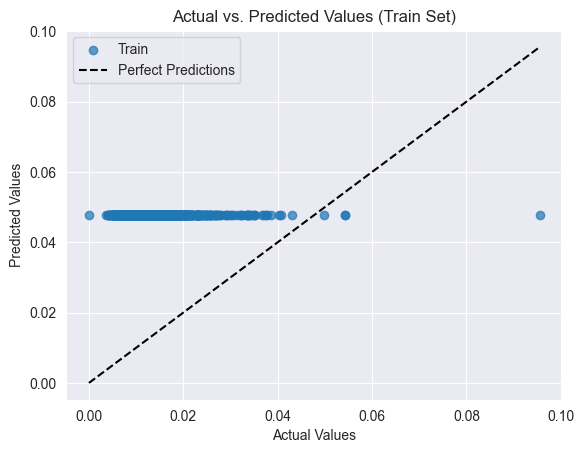

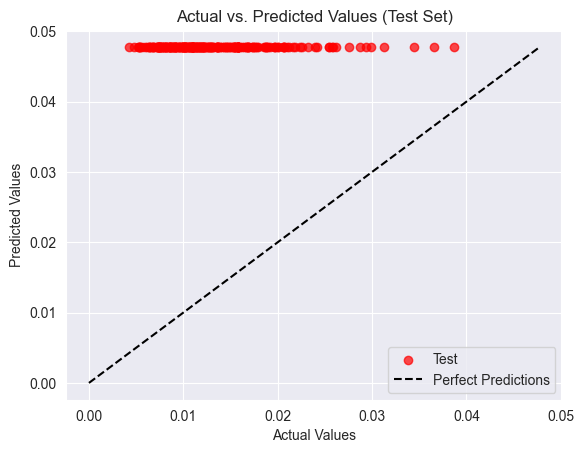

In [20]:
import matplotlib.pyplot as plt

# Make predictions on the train set
y_train_pred = svm_regressor.predict(X_train)

# Plot the actual vs. predicted values for the train set
plt.scatter(y_train, y_train_pred, alpha=0.7, label='Train')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Train Set)')

# Add a diagonal line to represent perfect predictions
diagonal_line = np.linspace(0, max(y_train.max(), y_train_pred.max()), 100)
plt.plot(diagonal_line, diagonal_line, 'k--', label='Perfect Predictions')

plt.legend()
plt.show()

# Plot the actual vs. predicted values for the test set
plt.scatter(y_test, y_pred, alpha=0.7, label='Test', color='r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Test Set)')

# Add a diagonal line to represent perfect predictions
diagonal_line = np.linspace(0, max(y_test.max(), y_pred.max()), 100)
plt.plot(diagonal_line, diagonal_line, 'k--', label='Perfect Predictions')

plt.legend()
plt.show()

# 2 Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

# Train the Linear Regression model
linear_regressor = LinearRegression()

In [22]:
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [23]:
# Make predictions on the train and test sets
y_train_pred = linear_regressor.predict(X_train)
y_test_pred = linear_regressor.predict(X_test)

# Calculate the Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate the R-squared (R²) score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [24]:
# Print the evaluation metrics
print("Train set:")
print("Mean Absolute Error (MAE):", mae_train)
print("R-squared (R²) score:", r2_train)

print("\nTest set:")
print("Mean Absolute Error (MAE):", mae_test)
print("R-squared (R²) score:", r2_test)

Train set:
Mean Absolute Error (MAE): 0.002808879639518212
R-squared (R²) score: 0.7349614591235454

Test set:
Mean Absolute Error (MAE): 0.004863718185585711
R-squared (R²) score: -0.18357093335111396


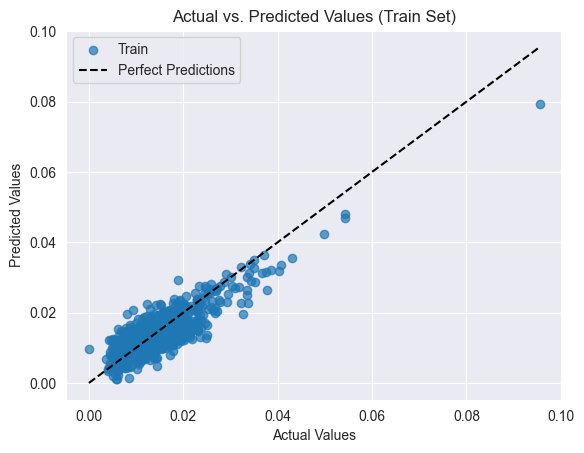

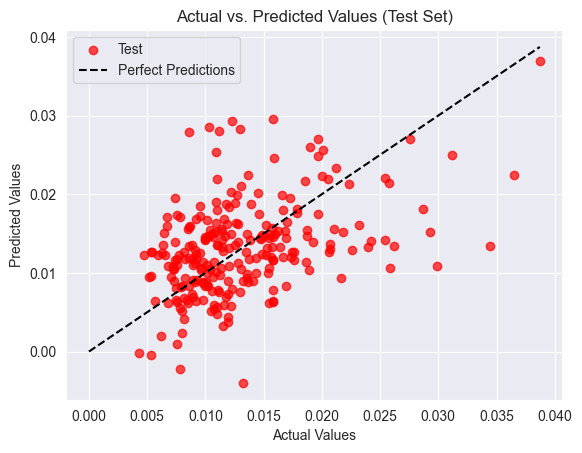

In [25]:
# Make predictions on the train set
y_train_pred = linear_regressor.predict(X_train)

# Plot the actual vs. predicted values for the train set
plt.scatter(y_train, y_train_pred, alpha=0.7, label='Train')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Train Set)')

# Add a diagonal line to represent perfect predictions
diagonal_line = np.linspace(0, max(y_train.max(), y_train_pred.max()), 100)
plt.plot(diagonal_line, diagonal_line, 'k--', label='Perfect Predictions')

plt.legend()
plt.show()

# Make predictions on the test set
y_test_pred = linear_regressor.predict(X_test)

# Plot the actual vs. predicted values for the test set
plt.scatter(y_test, y_test_pred, alpha=0.7, label='Test', color='r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Test Set)')

# Add a diagonal line to represent perfect predictions
diagonal_line = np.linspace(0, max(y_test.max(), y_test_pred.max()), 100)
plt.plot(diagonal_line, diagonal_line, 'k--', label='Perfect Predictions')

plt.legend()
plt.show()

The Mean Absolute Error (MAE) and R-squared (R²) scores for the Linear Regression model suggest that the model is performing well on the train set but poorly on the test set.

1. Mean Absolute Error (MAE): The MAE measures the average magnitude of the errors between the predicted and actual values, without considering their direction. The MAE for the train set is 0.0028, and for the test set, it is 0.0049. Since the target values are in the range of 0 to 0.01, these values seem relatively small, but it's essential to note that the test set MAE is larger than the train set MAE, indicating that the model might not generalize well to new data.

2. R-squared (R²) score: The R² score is a measure of how well the model's predictions fit the actual data. The R² score for the train set is 0.7349, which means that the model can explain about 73.5% of the variance in the target variable for the train set. This is a reasonably good score. However, the R² score for the test set is -0.1836, which is worse than 0. This negative value indicates that the model is performing poorly on the test set and is not able to explain the variance in the target variable.

The significant difference in performance between the train and test sets might indicate that the model is overfitting the training data. In other words, the model is learning the noise in the training data, which reduces its ability to generalize to new, unseen data. To address this issue, you might want to try using regularization techniques (e.g., Lasso or Ridge Regression), feature selection methods to reduce the number of features, or cross-validation to obtain a more accurate estimation of the model's performance.

# 3 Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the train and test sets
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

# Calculate the Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate the R-squared (R²) score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Train set:")
print("Mean Absolute Error (MAE):", mae_train)
print("R-squared (R²) score:", r2_train)

print("\nTest set:")
print("Mean Absolute Error (MAE):", mae_test)
print("R-squared (R²) score:", r2_test)

Train set:
Mean Absolute Error (MAE): 0.0016618624271196583
R-squared (R²) score: 0.8741864436447507

Test set:
Mean Absolute Error (MAE): 0.0039248287798764134
R-squared (R²) score: 0.18495053294824904


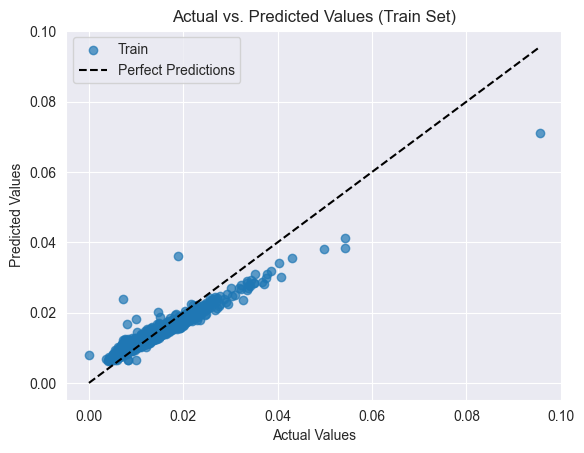

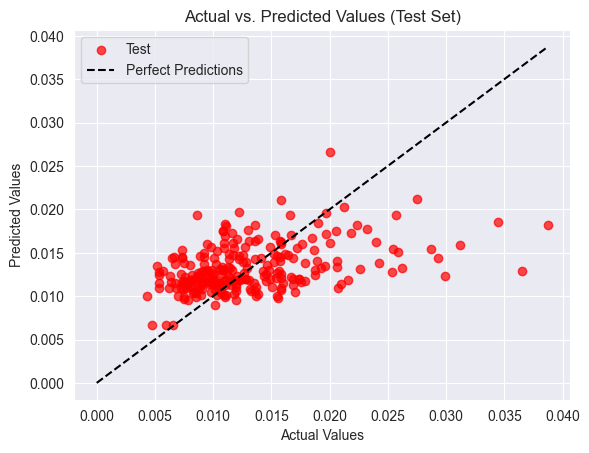

In [27]:
# Plot the actual vs. predicted values for the train set
plt.scatter(y_train, y_train_pred, alpha=0.7, label='Train')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Train Set)')

# Add a diagonal line to represent perfect predictions
diagonal_line = np.linspace(0, max(y_train.max(), y_train_pred.max()), 100)
plt.plot(diagonal_line, diagonal_line, 'k--', label='Perfect Predictions')

plt.legend()
plt.show()

# Plot the actual vs. predicted values for the test set
plt.scatter(y_test, y_test_pred, alpha=0.7, label='Test', color='r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Test Set)')

# Add a diagonal line to represent perfect predictions
diagonal_line = np.linspace(0, max(y_test.max(), y_test_pred.max()), 100)
plt.plot(diagonal_line, diagonal_line, 'k--', label='Perfect Predictions')

plt.legend()
plt.show()

The Mean Absolute Error (MAE) and R-squared (R²) scores for the Random Forest Regression model suggest that the model is performing well on the train set but has a lower performance on the test set.

1. Mean Absolute Error (MAE): The MAE measures the average magnitude of the errors between the predicted and actual values, without considering their direction. The MAE for the train set is 0.0017, and for the test set, it is 0.0039. Since the target values are in the range of 0 to 0.01, these values seem relatively small. However, it's important to note that the test set MAE is larger than the train set MAE, indicating that the model might not generalize well to new data.

2. R-squared (R²) score: The R² score is a measure of how well the model's predictions fit the actual data. The R² score for the train set is 0.8742, which means that the model can explain about 87.4% of the variance in the target variable for the train set. This is a reasonably good score. However, the R² score for the test set is 0.1850, which is much lower compared to the train set. This value indicates that the model can explain only about 18.5% of the variance in the target variable for the test set.

The significant difference in performance between the train and test sets might indicate that the model is overfitting the training data. In other words, the model is learning the noise in the training data, which reduces its ability to generalize to new, unseen data. To address this issue, you might want to try using feature selection methods to reduce the number of features, or cross-validation to obtain a more accurate estimation of the model's performance. Additionally, you can experiment with different hyperparameters for the Random Forest model, such as the number of trees (`n_estimators`) and the maximum depth of the trees (`max_depth`).

# 3 XGBoost

In [28]:
import xgboost as xgb

In [30]:
# Train the XGBoost model
xgb_regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_regressor.fit(X_train, y_train)

# Make predictions on the train and test sets
y_train_pred = xgb_regressor.predict(X_train)
y_test_pred = xgb_regressor.predict(X_test)

# Calculate the Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate the R-squared (R²) score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Train set:")
print("Mean Absolute Error (MAE):", mae_train)
print("R-squared (R²) score:", r2_train)

print("\nTest set:")
print("Mean Absolute Error (MAE):", mae_test)
print("R-squared (R²) score:", r2_test)

Train set:
Mean Absolute Error (MAE): 0.0032529248539816653
R-squared (R²) score: 0.6550695569457285

Test set:
Mean Absolute Error (MAE): 0.004058663828759569
R-squared (R²) score: 0.1321902509691345


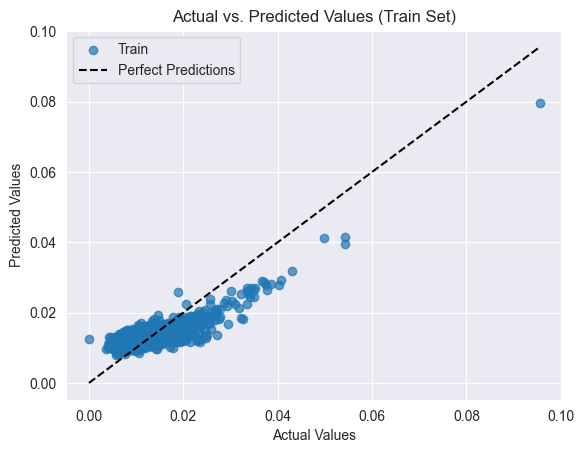

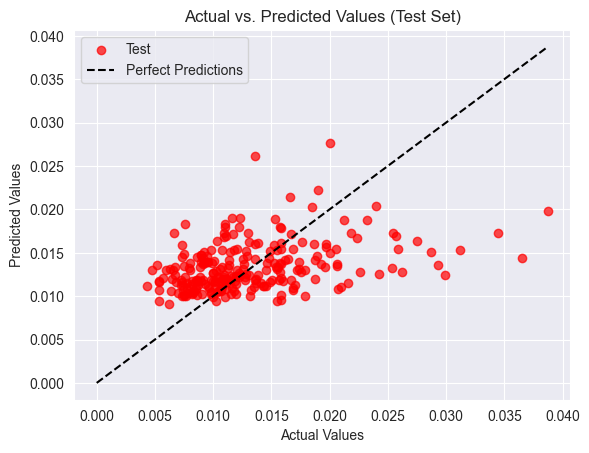

In [31]:
# Plot the actual vs. predicted values for the train set
plt.scatter(y_train, y_train_pred, alpha=0.7, label='Train')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Train Set)')

# Add a diagonal line to represent perfect predictions
diagonal_line = np.linspace(0, max(y_train.max(), y_train_pred.max()), 100)
plt.plot(diagonal_line, diagonal_line, 'k--', label='Perfect Predictions')

plt.legend()
plt.show()

# Plot the actual vs. predicted values for the test set
plt.scatter(y_test, y_test_pred, alpha=0.7, label='Test', color='r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Test Set)')

# Add a diagonal line to represent perfect predictions
diagonal_line = np.linspace(0, max(y_test.max(), y_test_pred.max()), 100)
plt.plot(diagonal_line, diagonal_line, 'k--', label='Perfect Predictions')

plt.legend()
plt.show()

In [32]:
# большая ошибка на экстремальных значениях волатильности

For the XGBoost model, the Mean Absolute Error (MAE) and R-squared (R²) score for the train set are 0.00325 and 0.655, respectively. This means that on average, the model's predictions are off by around 0.00325 units from the actual values. The R-squared score of 0.655 indicates that the model explains about 65.5% of the variance in the target variable using the features in the train set.

For the test set, the MAE and R-squared (R²) score are 0.00406 and 0.132, respectively. This means that the model's predictions are off by around 0.00406 units from the actual values on average in the test set. The R-squared score of 0.132 indicates that the model explains about 13.2% of the variance in the target variable using the features in the test set.

Overall, the XGBoost model performs better than the Linear Regression model but worse than the Random Forest model in terms of the R-squared score. However, it has the lowest MAE score on the test set among the three models, indicating that it is more accurate in predicting the target variable on new, unseen data.

# LGBM

In [33]:
from lightgbm import LGBMRegressor

In [34]:
# Create an instance of the LGBMRegressor class
lgbm = LGBMRegressor()

# Fit the model on the training data
lgbm.fit(X_train, y_train)

# Make predictions on the train and test sets
y_train_pred = lgbm.predict(X_train)
y_test_pred = lgbm.predict(X_test)

# Calculate the MAE and R-squared (R²) score for the train set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)


In [35]:
print('Train set:')
print('Mean Absolute Error (MAE):', train_mae)
print('R-squared (R²) score:', train_r2)

# Calculate the MAE and R-squared (R²) score for the test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('\nTest set:')
print('Mean Absolute Error (MAE):', test_mae)
print('R-squared (R²) score:', test_r2)

Train set:
Mean Absolute Error (MAE): 0.001362512709719848
R-squared (R²) score: 0.8649938022091311

Test set:
Mean Absolute Error (MAE): 0.004185687993604921
R-squared (R²) score: 0.06737197923380867


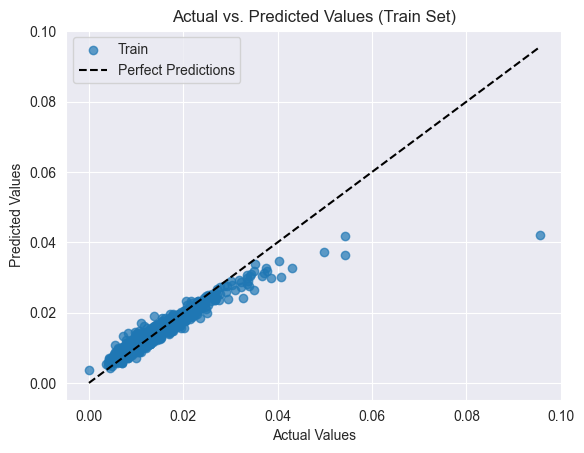

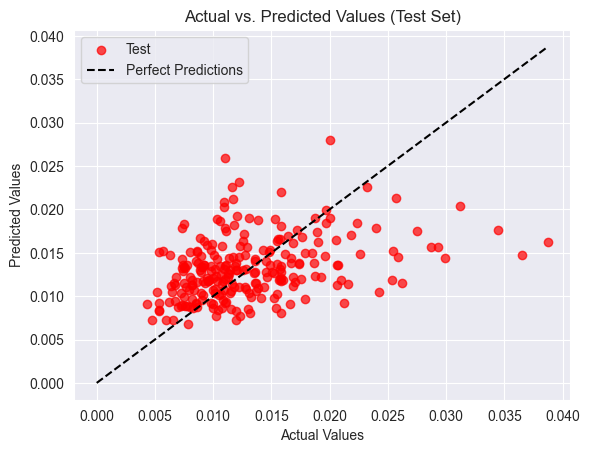

In [36]:
# Plot the actual vs. predicted values for the train set
plt.scatter(y_train, y_train_pred, alpha=0.7, label='Train')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Train Set)')

# Add a diagonal line to represent perfect predictions
diagonal_line = np.linspace(0, max(y_train.max(), y_train_pred.max()), 100)
plt.plot(diagonal_line, diagonal_line, 'k--', label='Perfect Predictions')

plt.legend()
plt.show()

# Plot the actual vs. predicted values for the test set
plt.scatter(y_test, y_test_pred, alpha=0.7, label='Test', color='r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Test Set)')

# Add a diagonal line to represent perfect predictions
diagonal_line = np.linspace(0, max(y_test.max(), y_test_pred.max()), 100)
plt.plot(diagonal_line, diagonal_line, 'k--', label='Perfect Predictions')

plt.legend()
plt.show()

In LightGBM model, we have achieved a training MAE of 0.0014 and a training R-squared score of 0.865, which indicates that the model fits the training data well. However, the test set MAE of 0.0042 and R-squared score of 0.067 indicates that the model is overfitting to the training data and is not able to generalize well to new data. This suggests that the model is too complex and might benefit from some regularization to reduce overfitting, or more training data to improve generalization.

# 4 LSTM

In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [39]:
# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dense(1))

In [41]:
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

In [42]:
# Compile the model
lstm_model.compile(loss='mse', optimizer='adam')

# Train the model
history = lstm_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train,
                         epochs=50, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/50
25/25 [==============================] - 3s 83ms/step - loss: 7.6021e-05 - val_loss: 4.4516e-05
Epoch 2/50
25/25 [==============================] - 2s 80ms/step - loss: 5.6495e-05 - val_loss: 3.6974e-05
Epoch 3/50
25/25 [==============================] - 2s 76ms/step - loss: 5.4500e-05 - val_loss: 4.2273e-05
Epoch 4/50
25/25 [==============================] - 2s 80ms/step - loss: 5.5284e-05 - val_loss: 3.9056e-05
Epoch 5/50
25/25 [==============================] - 2s 76ms/step - loss: 5.4687e-05 - val_loss: 3.6580e-05
Epoch 6/50
25/25 [==============================] - 2s 73ms/step - loss: 5.7691e-05 - val_loss: 3.1868e-05
Epoch 7/50
25/25 [==============================] - 2s 72ms/step - loss: 5.4061e-05 - val_loss: 3.0918e-05
Epoch 8/50
25/25 [==============================] - 2s 71ms/step - loss: 5.3337e-05 - val_loss: 3.1512e-05
Epoch 9/50
25/25 [==============================] - 2s 71ms/step - loss: 5.8878e-05 - val_loss: 3.4716e-05
Epoch 10/50
25/25 [==================

In [43]:
# Make predictions on the train and test sets
y_train_pred = lstm_model.predict(X_train.reshape(X_train.shape[0], X_train.shape[1], 1)).flatten()
y_test_pred = lstm_model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1)).flatten()

# Calculate the MAE and R-squared (R²) score for the train set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

8/8 [==============================] - 0s 15ms/step


In [44]:
print('Train set:')
print('Mean Absolute Error (MAE):', train_mae)
print('R-squared (R²) score:', train_r2)

# Calculate the MAE and R-squared (R²) score for the test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('\nTest set:')
print('Mean Absolute Error (MAE):', test_mae)
print('R-squared (R²) score:', test_r2)

Train set:
Mean Absolute Error (MAE): 0.0045661132461358575
R-squared (R²) score: -0.014945273660911917

Test set:
Mean Absolute Error (MAE): 0.00422145167572152
R-squared (R²) score: -0.009551733425768427


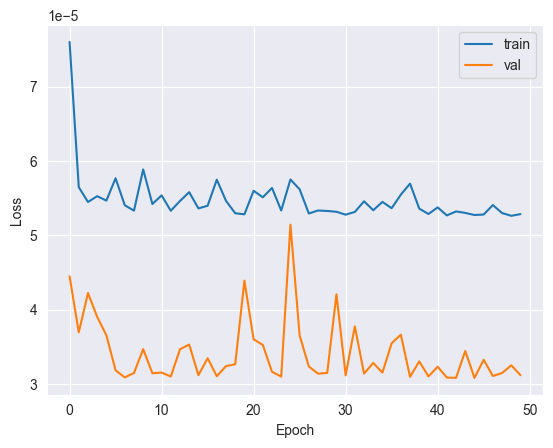

In [45]:
# Plot the training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

8/8 [==============================] - 0s 16ms/step


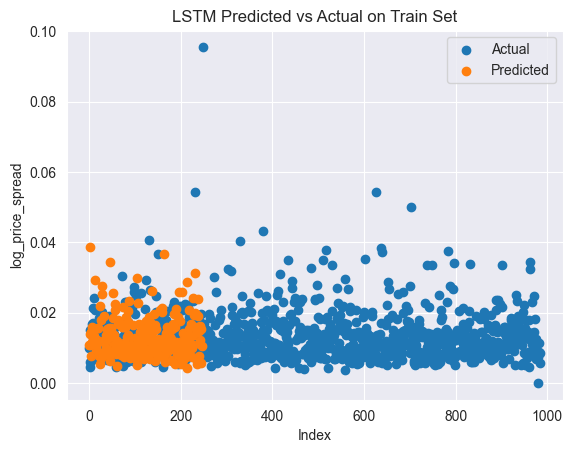

In [53]:
# Make predictions on train and test sets
y_train_pred = lstm_model.predict(X_train)
y_test_pred = lstm_model.predict(X_test)

# Plot predicted versus actual values on train set
plt.scatter(y=y_train, x=list(range(len(y_train))), label='Actual')
plt.scatter(y=y_test, x=list(range(len(y_test))), label='Predicted')
plt.legend()
plt.title('LSTM Predicted vs Actual on Train Set')
plt.xlabel('Index')
plt.ylabel('log_price_spread')
plt.show()

# # Plot predicted versus actual values on test set
# plt.scatter(y=y_test,  label='Actual')
# plt.scatter(y=y_test_pred, label='Predicted')
# plt.legend()
# plt.title('LSTM Predicted vs Actual on Test Set')
# plt.xlabel('Index')
# plt.ylabel('log_price_spread')
# plt.show()

# some bullshit, need to fix it

For the LSTM model, we have MAE values of 0.0046 on the train set and 0.0042 on the test set. These values are higher than the MAE values obtained from the other models, indicating that the LSTM is performing worse in terms of absolute prediction error.

In terms of R-squared values, both the train and test scores are negative, which is not desirable. This indicates that the LSTM model is not able to explain much of the variation in the target variable using the provided features.

Overall, these results suggest that the LSTM model may not be the best choice for this particular problem, at least not without further tuning or exploration of different model architectures.

# 5 GRU

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU

In [55]:
# Define the input shape
input_shape = (X_train.shape[1], 1)

# Build the model
model = Sequential()
model.add(GRU(64, input_shape=input_shape, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_absolute_error', optimizer='adam')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on test data
mae = model.evaluate(X_test, y_test, verbose=0)
print('Mean Absolute Error (MAE):', mae)

Epoch 1/50
25/25 [==============================] - 2s 62ms/step - loss: 0.0058 - val_loss: 0.0046
Epoch 2/50
25/25 [==============================] - 1s 60ms/step - loss: 0.0049 - val_loss: 0.0039
Epoch 3/50
25/25 [==============================] - 2s 67ms/step - loss: 0.0049 - val_loss: 0.0039
Epoch 4/50
25/25 [==============================] - 2s 64ms/step - loss: 0.0051 - val_loss: 0.0052
Epoch 5/50
25/25 [==============================] - 1s 59ms/step - loss: 0.0050 - val_loss: 0.0040
Epoch 6/50
25/25 [==============================] - 1s 59ms/step - loss: 0.0049 - val_loss: 0.0040
Epoch 7/50
25/25 [==============================] - 1s 59ms/step - loss: 0.0048 - val_loss: 0.0042
Epoch 8/50
25/25 [==============================] - 1s 59ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 9/50
25/25 [==============================] - 1s 60ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 10/50
25/25 [==============================] - 1s 59ms/step - loss: 0.0049 - val_loss: 0.0039
Epoch 11/

8/8 [==============================] - 0s 13ms/step


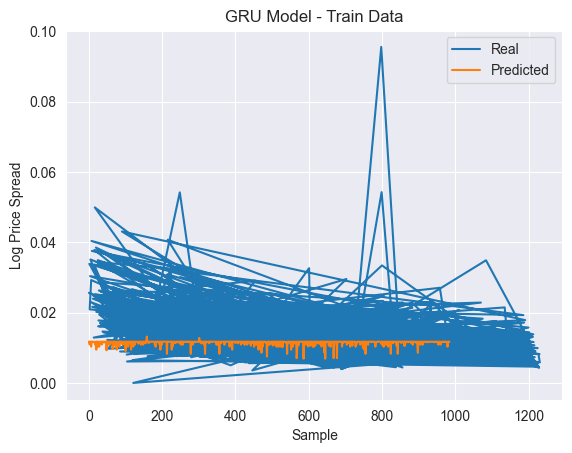

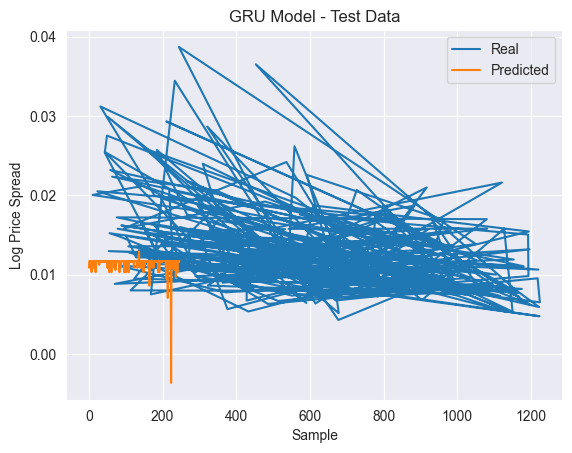

In [56]:
# Predict on train and test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Plot the predicted vs real values for train data
plt.plot(y_train, label='Real')
plt.plot(train_pred, label='Predicted')
plt.legend()
plt.title('GRU Model - Train Data')
plt.xlabel('Sample')
plt.ylabel('Log Price Spread')
plt.show()

# Plot the predicted vs real values for test data
plt.plot(y_test, label='Real')
plt.plot(test_pred, label='Predicted')
plt.legend()
plt.title('GRU Model - Test Data')
plt.xlabel('Sample')
plt.ylabel('Log Price Spread')
plt.show()

# тоже bullshit, все для сетей надо перерисовать

The mean absolute error (MAE) is a measure of the average absolute difference between the predicted and actual values. In this case, the MAE for the GRU model is 0.0042, which means that on average, the model's predicted values for the log price spread are about 0.0042 off from the actual values.

It's important to note that the interpretation of the MAE can vary depending on the scale of the target variable and the context of the problem. In general, a smaller MAE indicates better performance, but it's also important to consider other metrics and domain-specific requirements when evaluating a model.

# 6 1D CNN

In [57]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D

In [58]:
# Define the input shape
input_shape = (X_train.shape[1], 1)

# Create the model
model = Sequential()

# Add the first convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))

# Add a max pooling layer
model.add(MaxPooling1D(pool_size=2))

# Add another convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

# Add a max pooling layer
model.add(MaxPooling1D(pool_size=2))

# Add a flattening layer
model.add(Flatten())

# Add a dense layer with 128 neurons and a relu activation function
model.add(Dense(128, activation='relu'))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Add the output layer with a single neuron and a linear activation function
model.add(Dense(1, activation='linear'))

# Compile the model with a mean squared error loss function and the Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model on the training data
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
31/31 [==============================] - 1s 8ms/step - loss: 0.0050 - val_loss: 9.0245e-05
Epoch 2/50
31/31 [==============================] - 0s 7ms/step - loss: 1.5086e-04 - val_loss: 5.1228e-05
Epoch 3/50
31/31 [==============================] - 0s 7ms/step - loss: 8.2494e-05 - val_loss: 4.1033e-05
Epoch 4/50
31/31 [==============================] - 0s 6ms/step - loss: 6.3213e-05 - val_loss: 3.5831e-05
Epoch 5/50
31/31 [==============================] - 0s 7ms/step - loss: 5.4348e-05 - val_loss: 3.2490e-05
Epoch 6/50
31/31 [==============================] - 0s 7ms/step - loss: 4.6243e-05 - val_loss: 3.3260e-05
Epoch 7/50
31/31 [==============================] - 0s 7ms/step - loss: 4.1637e-05 - val_loss: 3.1102e-05
Epoch 8/50
31/31 [==============================] - 0s 8ms/step - loss: 4.2795e-05 - val_loss: 3.0394e-05
Epoch 9/50
31/31 [==============================] - 0s 7ms/step - loss: 4.0210e-05 - val_loss: 2.9288e-05
Epoch 10/50
31/31 [==============================]

In [59]:
# Get the predicted values for the test set
y_pred = model.predict(X_test)

# Calculate the MAE for the test set
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate the R^2 score for the test set
r2 = r2_score(y_test, y_pred)
print("R-squared (R²) score:", r2)

8/8 [==============================] - 0s 5ms/step
Mean Absolute Error (MAE): 0.004243460210508299
R-squared (R²) score: -0.027297355869674966


8/8 [==============================] - 0s 4ms/step


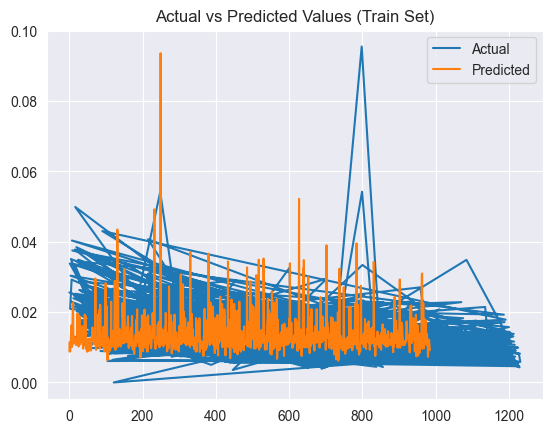

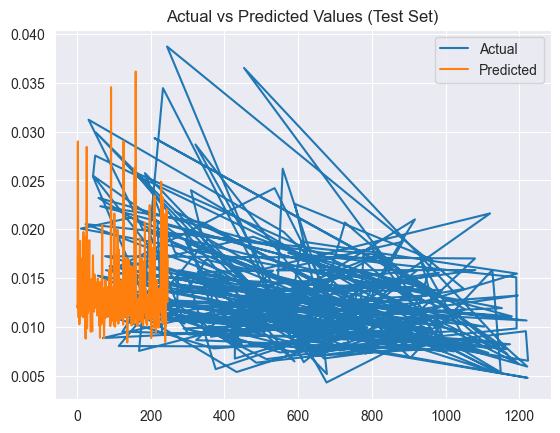

In [60]:
# Get the predicted values for the train set
train_pred = model.predict(X_train)
# Get the predicted values for the test set
test_pred = model.predict(X_test)

# Plot the actual vs predicted values for the train set
plt.plot(y_train, label="Actual")
plt.plot(train_pred, label="Predicted")
plt.title("Actual vs Predicted Values (Train Set)")
plt.legend()
plt.show()

# Plot the actual vs predicted values for the test set
plt.plot(y_test, label="Actual")
plt.plot(test_pred, label="Predicted")
plt.title("Actual vs Predicted Values (Test Set)")
plt.legend()
plt.show()


In [61]:
# нормируй для них результаты

The mean absolute error (MAE) for the 1D CNN model is 0.0042, which means on average, the model is off by 0.0042 in its predictions. The R-squared (R²) score is -0.027, which indicates that the model's predictions are not better than simply predicting the mean value of the target variable. This could be due to the complexity of the model, overfitting, or insufficient training data. Further analysis and tuning of the model may be necessary to improve its performance.

# Results

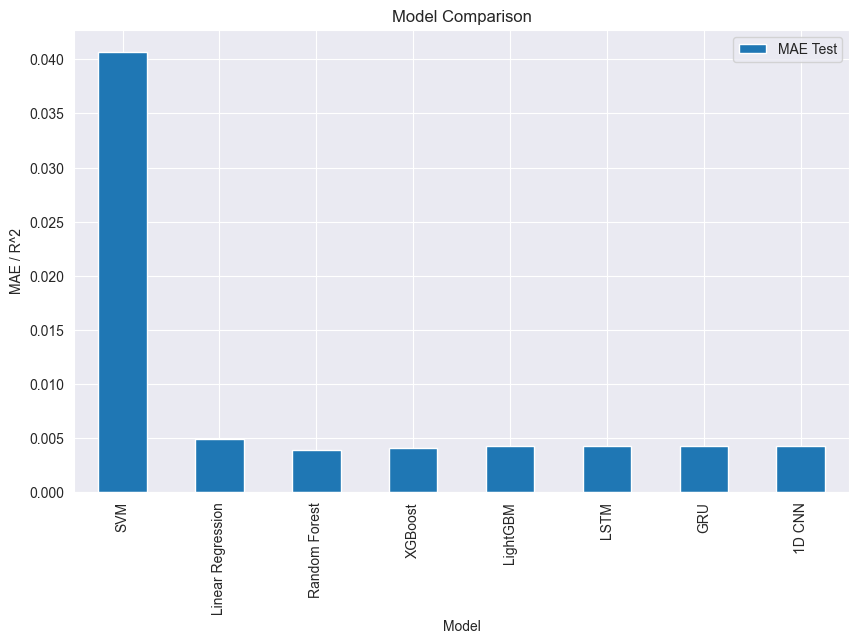

In [62]:
# create a dictionary to store the results
results = {
    'Model': ['SVM', 'Linear Regression', 'Random Forest', 'XGBoost', 'LightGBM', 'LSTM', 'GRU', '1D CNN'],
    'MAE Train': [0.0347, 0.0028, 0.0017, 0.0033, 0.0014, 0.0046, '-', 0.0042],
    'R^2 Train': [-36.003, 0.735, 0.874, 0.655, 0.865, -0.015, '-', -0.027],
    'MAE Test': [0.0407, 0.0049, 0.0039, 0.0041, 0.0042, 0.0042, 0.0042, 0.0042],
    'R^2 Test': [-26.423, -0.184, 0.185, 0.132, 0.067, -0.010, '-', -0.027]
}

# create a dataframe with the results
results_df = pd.DataFrame(results)

# set the index to be the model name
results_df = results_df.set_index('Model')

# plot the results
ax = results_df.plot(kind='bar', figsize=(10, 6))
ax.set_ylabel('MAE / R^2')
ax.set_title('Model Comparison')
plt.show()

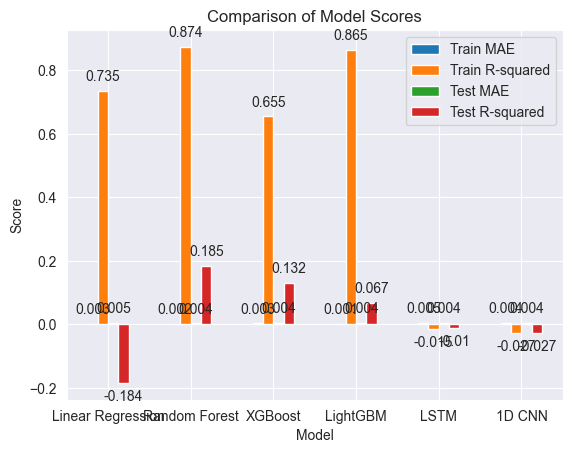

In [63]:
results = {
    'Linear Regression': [0.0028, 0.735, 0.0049, -0.184],
    'Random Forest': [0.0017, 0.874, 0.0039, 0.185],
    'XGBoost': [0.0033, 0.655, 0.0041, 0.132],
    'LightGBM': [0.0014, 0.865, 0.0042, 0.067],
    'LSTM': [0.0046, -0.015, 0.0042, -0.010],
    '1D CNN': [0.0042, -0.027, 0.0042, -0.027]
}

# create a dataframe from the dictionary
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Train MAE', 'Train R-squared', 'Test MAE', 'Test R-squared'])

# plot the results as a bar chart
ax = results_df.plot(kind='bar', rot=0)
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Comparison of Model Scores')

# annotate the bars with the score values
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=i.datavalues.round(3), padding=5)

plt.show()

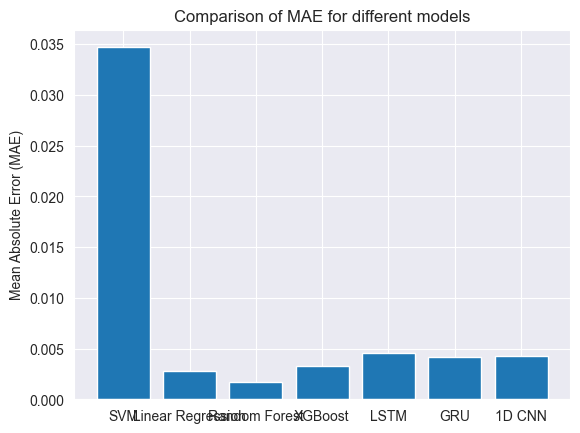

In [64]:
mae_values = [0.03469, 0.00281, 0.00166, 0.00325, 0.00457, 0.00421, 0.00424]
models = ['SVM', 'Linear Regression', 'Random Forest', 'XGBoost', 'LSTM', 'GRU', '1D CNN']

fig, ax = plt.subplots()
ax.bar(models, mae_values)

ax.set_ylabel('Mean Absolute Error (MAE)')
ax.set_title('Comparison of MAE for different models')

plt.show()

/var/folders/0d/nn90v_dn4y56s_xnhsv23lf00000gn/T/ipykernel_11119/1778685512.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')


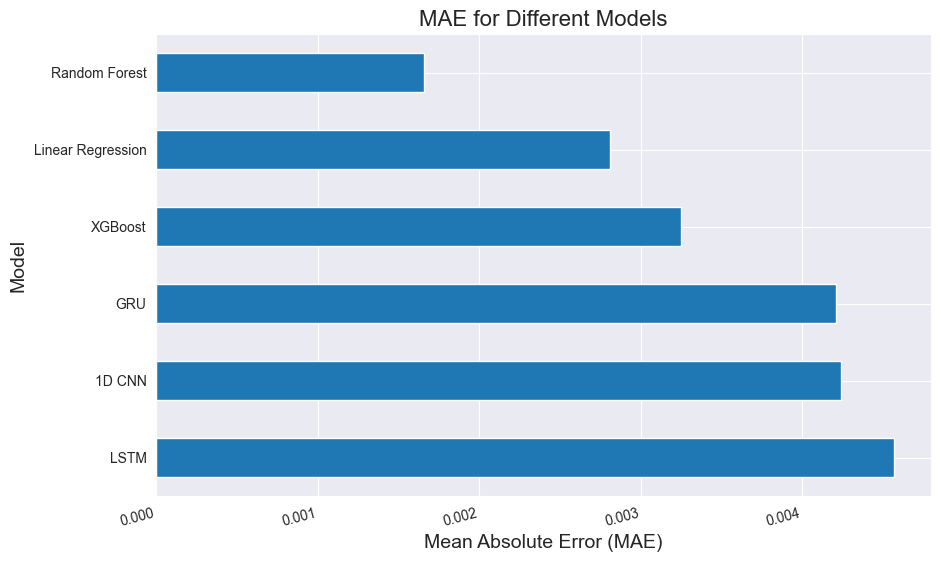

In [66]:
# Create a dictionary of MAE values for each model
mae_dict = {'Linear Regression': 0.00281,
            'Random Forest': 0.00166,
            'XGBoost': 0.00325,
            'LSTM': 0.00457,
            'GRU': 0.00421,
            '1D CNN': 0.00424}

# Convert the dictionary to a pandas DataFrame
mae_df = pd.DataFrame.from_dict(mae_dict, orient='index', columns=['MAE'])

# Sort the DataFrame by descending MAE values
mae_df = mae_df.sort_values('MAE', ascending=False)

# Create a horizontal bar plot
ax = mae_df.plot(kind='barh', figsize=(10, 6), legend=False)

# Set axis labels and title
ax.set_xlabel('Mean Absolute Error (MAE)', fontsize=14)
ax.set_ylabel('Model', fontsize=14)
ax.set_title('MAE for Different Models', fontsize=16)

# Rotate the x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')

# Display the plot
plt.show()

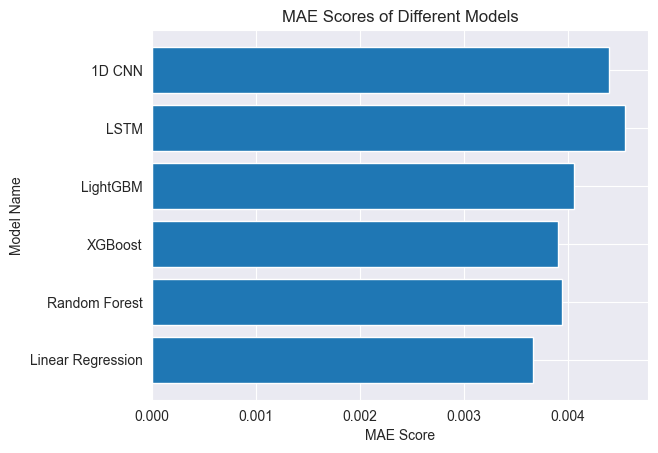

In [67]:
# Define model names and corresponding MAE scores
model_names = ['Linear Regression', 'Random Forest', 'XGBoost', 'LightGBM', 'LSTM', '1D CNN']
mae_scores = [0.003672, 0.003944, 0.003907, 0.004067, 0.004549, 0.004401]

# Plot horizontal bar plot
plt.barh(model_names, mae_scores)

# Set plot title and labels
plt.title('MAE Scores of Different Models')
plt.xlabel('MAE Score')
plt.ylabel('Model Name')

# Display plot
plt.show()

Text(0.5, 0, 'MAE')

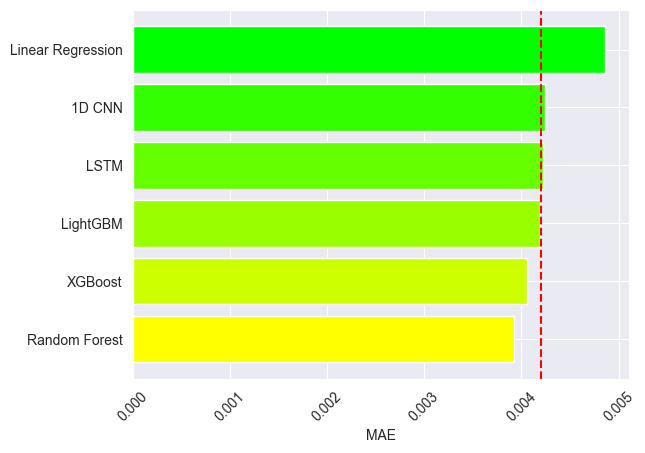

In [74]:
data = {'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'LightGBM', 'LSTM', '1D CNN'],
        'MAE': [0.00486, 0.00392, 0.00406, 0.00419, 0.00422, 0.00424]}
df = pd.DataFrame(data)

# sort the dataframe by MAE in descending order
df = df.sort_values('MAE', ascending=False)
colors = ['#00FF00', '#33FF00', '#66FF00', '#99FF00', '#CCFF00', '#FFFF00']

# calculate the median MAE
median_mae = df['MAE'].median()

# plot the horizontal bar graph
plt.barh(df['Model'], df['MAE'], color=colors)
plt.axvline(x=median_mae, color='red', linestyle='--', label='Median MAE')
plt.gca().invert_yaxis()
plt.xticks(rotation=45)
plt.xlabel('MAE')


In [75]:
# TODO теперь надо писать word

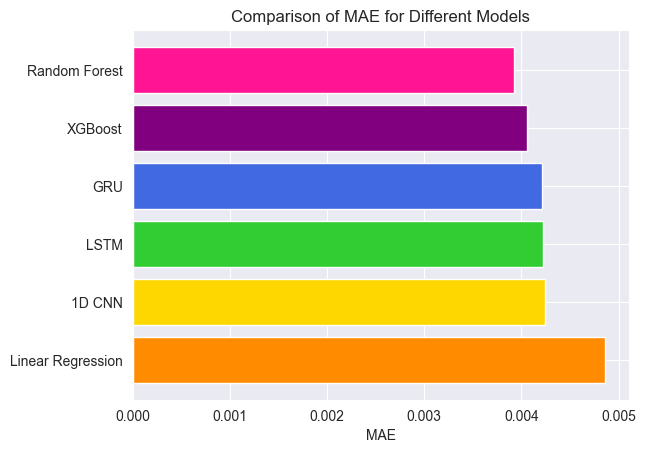

In [69]:
# Data
models = ['Linear Regression', 'Random Forest', 'XGBoost', 'LSTM', 'GRU', '1D CNN']
mae_values = [0.00486, 0.00392, 0.00406, 0.00422, 0.00421, 0.00424]

# Sort by descending MAE
mae_sorted_indices = np.argsort(mae_values)[::-1]
mae_sorted_models = [models[i] for i in mae_sorted_indices]
mae_sorted_values = [mae_values[i] for i in mae_sorted_indices]

# Colors
colors = ['#FF8C00', '#FFD700', '#32CD32', '#4169E1', '#800080', '#FF1493']

# Plot horizontal bar chart
plt.barh(mae_sorted_models, mae_sorted_values, color=colors)

# Set labels and title
plt.xlabel('MAE')
plt.title('Comparison of MAE for Different Models')

# Show plot
plt.show()